<a href="https://colab.research.google.com/github/JaquelineEspinoza/EDP2/blob/main/M%C3%A9todo%20de%20M%C3%ADnimos%20Cuadr%C3%A1dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Método de Mínimos Cuadrádos**

Considerar un problema de valor inicial $u''+u=x$ con condiciones $u(0)=0$ y $u'(0)=2$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, α0, α1, α2, α3 = sp.symbols('x α0 α1 α2 α3')
u = sp.Function('u')

In [3]:
ode = u(x).diff(x, x) + u(x) - x

In [4]:
sol = sp.dsolve(ode, ics = {u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})

In [5]:
sol

Eq(u(x), x + sin(x))

In [6]:
u_expr = sol.rhs

In [7]:
u_num = sp.lambdify(x, u_expr, "numpy") #se define como arreglos

In [8]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

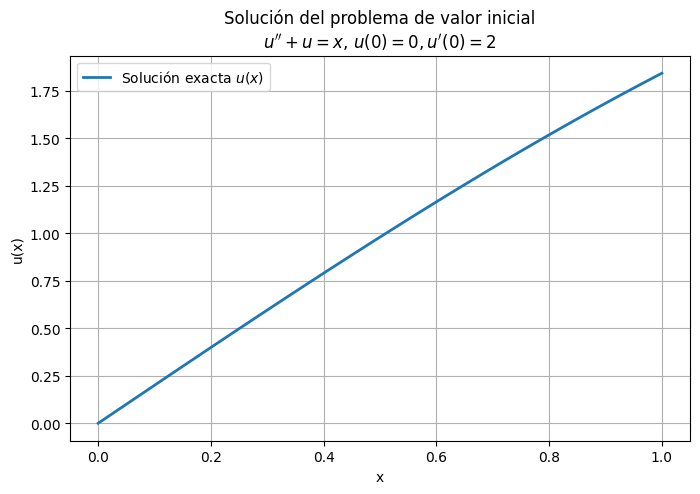

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución exacta $u(x)$", linewidth=2)
plt.title('Solución del problema de valor inicial\n$u\'\' + u = x$, $u(0)=0, u\'(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
#Solución numérica por MÍNIMOS CUADRADOS
#Proponemos la función prueba cúbica
# u_N = α0 + α1*x + α2*x^2 + α3*x^3

# (i) Aplicar condiciones iniciales directamente:
# u(0)=0 → α0=0
# u'(0)=2 → α1=2
α0_val = 0
α1_val = 2

In [11]:
# Función de prueba que cumple las condiciones iniciales
u_n = α0_val + α1_val*x + α2*x**2 + α3*x**3

In [12]:
u_n

x**3*α3 + x**2*α2 + 2*x

In [13]:
u_n_2 = sp.diff(u_n, x, 2) #Segunda derivada

In [14]:
# RESIDUAL: E(x) = u_n'' + u_n - x (debe minimizarse)
E = u_n_2 + u_n - x

In [15]:
E

x**3*α3 + x**2*α2 + x + 2*(3*x*α3 + α2)

In [16]:
E.simplify()

x**3*α3 + x**2*α2 + 6*x*α3 + x + 2*α2

In [17]:
 # Integral del cuadrado del residual
I = sp.integrate(E**2, (x, 0, 1))

In [18]:
I

83*α2**2/15 + 49*α2*α3/3 + 5*α2/2 + 509*α3**2/35 + 22*α3/5 + 1/3

In [19]:
# Derivadas parciales con respecto a α2 y α3
dIα2 = sp.diff(I, α2)
dIα3 = sp.diff(I, α3)
print("Derivadas parciales:")
print("dI/dα2 =", dIα2)
print("dI/dα3 =", dIα3)

Derivadas parciales:
dI/dα2 = 166*α2/15 + 49*α3/3 + 5/2
dI/dα3 = 49*α2/3 + 1018*α3/35 + 22/5


In [20]:
# Igualar a 0 y resolver para α2 y α3
soleq = sp.solve([dIα2, dIα3], [α2, α3], simplify = True)
soleq

{α2: -1335/86789, α3: -24759/173578}

In [30]:
# Sustituir en la función de prueba (NO en E, en u_n)
u_approx = E.subs(soleq)

In [32]:
print("\nSolución aproximada por mínimos cuadrados:")
sp.pprint(u_approx)


Solución aproximada por mínimos cuadrados:
         3         2                  
  24759⋅x    1335⋅x    12512⋅x   2670 
- ──────── - ─────── + ─────── - ─────
   173578     86789     86789    86789


In [33]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

In [34]:
#Solución analítica y numérica
xx = np.linspace(0, 1, 100)

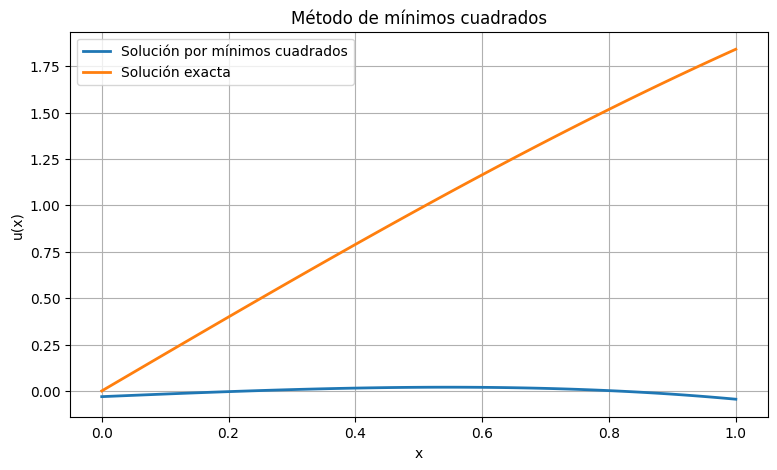

In [35]:
plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Solución por mínimos cuadrados", linewidth=2)
plt.plot(xx, yy, label="Solución exacta", linewidth=2)
plt.title("Método de mínimos cuadrados")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()